In [1]:
%%capture
%run "5 - Statistics.ipynb"
%run "8 - Gradient Descent.ipynb"
import matplotlib.pyplot as plt
import random
%matplotlib inline

# The Model
Let us define a simple prediction function that takes two constants, $\alpha$ and $\beta$:

In [2]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

What should we use for `alpha` and `beta`? Suppose we know the desired output `y_i`, we can calculate the error for our inputs:

In [3]:
def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

Now we can calculate the errors across the entire data set:

In [4]:
def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i)**2 for x_i, y_i in zip(x, y))

Now we just need to find the inputs that minimize the sum of squared errors:

In [5]:
def least_squares_fit(x, y):
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [6]:
alpha, beta = least_squares_fit(num_friends_clean, daily_minutes_clean)
alpha, beta

(22.94755241346903, 0.903865945605865)

In [7]:
predict(alpha, beta, 20)

41.02487132558633

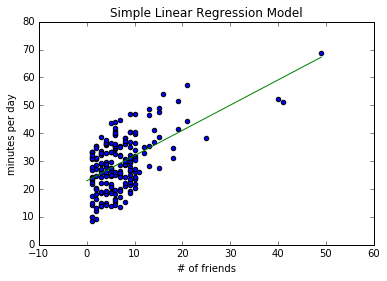

In [8]:
plt.title('Simple Linear Regression Model');
plt.ylabel('minutes per day');
plt.xlabel('# of friends')
plt.scatter(num_friends_clean, daily_minutes_clean);
plt.plot(range(0, 50), [predict(alpha, beta, x) for x in range(0, 50)], color='green');

Our model is pretty good for how simple it is! We can measure how well a model does using the _coefficient of determination_ (aka. _R-squared_). This measures the fraction of the total amount of variation in the dependent variable that is predicted by the model.

In [9]:
def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / total_sum_of_squares(y))

r_squared(alpha, beta, num_friends_clean, daily_minutes_clean) # 0.329

0.3291078377836305

Higher R-squared scores represent a better fitting model. 1 is the highest that an R-squared score can go.

# Using Gradient Descent
We can also make predictions using the _Gradient Descent_ algorithm:

In [10]:
def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i), # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative

# choose random value to start
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error, squared_error_gradient, num_friends_clean, daily_minutes_clean, theta, 0.0001)
print(alpha, beta)

0.8444218515250481 0.7579544029403025


\# TODO
Fix the example above...it's wrong, should be 22.93, 0.905